In [1]:
""" Prepare and load the data for input - 
    1. folders = ["path_to_wt_dir", path_to_oe1_dir", "path_to_oe2_dir", ...]
    2. column_names = ['Area_Percentage', 'Compound_Name'] // these two columns are necessary 
"""

' Prepare and load the data for input - \n    1. folders = ["path_to_wt_dir", path_to_oe1_dir", "path_to_oe2_dir", ...]\n    2. column_names = [\'Area_Percentage\', \'Compound_Name\'] // these two columns are necessary \n'

In [2]:
# prepare dataframe for further analysis

from mbSTATS.data_preparation import load_csv_data
from mbSTATS.final_df_prep import create_summary_dataframe 
folders = ["/home/satvik/Thesis/csv/wt", "/home/satvik/Thesis/csv/oe", "/home/satvik/Thesis/csv/oe2"]
column_names = [
    "Start_Time", "End_Time", "Retention_Time", "Ion_Mode", 
    "Intensity", "Area_Percentage", "Adjusted_Intensity", 
    "Adjusted_Area_Percentage", "Peak_Width", "Flag", 
    "Compound_Name", "CAS_Number", "Similarity_Score"
]
dataframes = load_csv_data(folders, column_names)
print("Dataframes loaded:", list(dataframes.keys()))  #
summary_df, compound_to_code = create_summary_dataframe(dataframes)
    
print("Summary DataFrame:")
print(summary_df)

print("Compounds to code:")
print(compound_to_code)


Dataframes loaded: ['wt_wt1_1', 'wt_wt1_3', 'wt_wt1_2', 'oe_oe1_2', 'oe_oe1_3', 'oe_oe1_1', 'oe2_oe2_3', 'oe2_oe2_1', 'oe2_oe2_2']
Summary DataFrame:
      sample    c1    c2    c3    c4    c5    c6    c7    c8     c9
0   wt_wt1_1  1.53  1.95  0.48  0.82  4.05  3.35  1.61  1.78   0.48
1   wt_wt1_3  1.88  5.79  0.65  1.04  5.23  4.74  1.97  2.39   9.70
2   wt_wt1_2  1.65  2.27  7.33  0.90  4.75  4.40  1.83  2.12  10.40
3   oe_oe1_2  7.36  1.46  5.31  4.47  5.21  1.23  2.58  3.09  10.47
4   oe_oe1_3  7.60  1.43  5.28  4.81  5.29  1.19  2.52  3.14   9.96
5   oe_oe1_1  7.44  1.42  5.32  4.48  5.00  1.22  2.53  3.15   9.92
6  oe2_oe2_3  1.04  0.47  6.50  0.51  5.50  3.07  1.28  0.36  15.35
7  oe2_oe2_1  0.95  9.47  6.26  0.49  5.29  3.07  1.28  0.25  16.20
8  oe2_oe2_2  0.99  0.68  0.31  0.53  5.55  3.09  1.28  0.26  16.11
Compounds to code:
{'1-Monopalmitin, 2TMS derivative': 'c1', 'D-Allose, oxime (isomer 1), 6TMS derivative': 'c2', 'D-Fructose, 1,3,4,5,6-pentakis-O-(trimethylsilyl)-, O-m

In [3]:
# now use different types of normalization techniques on the original dataframe 
# applying tsn normalization 

from mbSTATS.normalization_methods.tsn_normalization import tsn_normalization

tsn_normalized_df = tsn_normalization(summary_df)
print(tsn_normalized_df)

      sample        c1        c2        c3        c4        c5        c6  \
0   wt_wt1_1  0.095327  0.121495  0.029907  0.051090  0.252336  0.208723   
1   wt_wt1_3  0.056304  0.173405  0.019467  0.031147  0.156634  0.141959   
2   wt_wt1_2  0.046283  0.063675  0.205610  0.025245  0.133240  0.123422   
3   oe_oe1_2  0.178728  0.035454  0.128946  0.108548  0.126518  0.029869   
4   oe_oe1_3  0.184377  0.034692  0.128093  0.116691  0.128336  0.028869   
5   oe_oe1_1  0.183794  0.035079  0.131423  0.110672  0.123518  0.030138   
6  oe2_oe2_3  0.030516  0.013791  0.190728  0.014965  0.161385  0.090082   
7  oe2_oe2_1  0.021960  0.218909  0.144706  0.011327  0.122284  0.070966   
8  oe2_oe2_2  0.034375  0.023611  0.010764  0.018403  0.192708  0.107292   

         c7        c8        c9  
0  0.100312  0.110903  0.029907  
1  0.059000  0.071578  0.290506  
2  0.051332  0.059467  0.291725  
3  0.062652  0.075036  0.254250  
4  0.061135  0.076177  0.241630  
5  0.062500  0.077816  0.245059  
6

  Compound   p-value
0       c1  0.327533
1       c2  0.237709
2       c3  0.609940
3       c4  0.276585
4       c5  0.406315
5       c6  0.039358
6       c7  0.307878
7       c8  0.132232
8       c9  0.223569


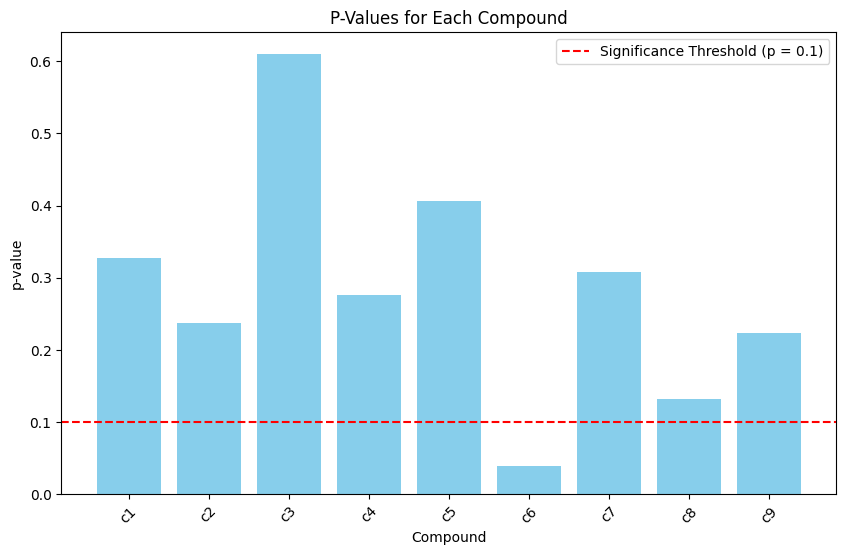

In [9]:
from mbSTATS.pval_calculation import calculate_p_values
from mbSTATS.pval_plot import plot_p_values 

p_values_df = calculate_p_values(tsn_normalized_df)
print(p_values_df)
plot_p_values(p_values_df, th=0.1)
